In [1]:
from matplotlib import pyplot
#2x+y
f_obj = [2,1]
ineq = [[2,0],[3,1],[0,3],[0,1]]   
ineq_r = [20,5,8,2]

## Dibujar inecuaciones

In [21]:
def graph_inec(ineq,ineq_r):
    for i , r in zip(ineq,ineq_r):
        l=10
        #print(i,r)
        x=i[0]
        y=i[1]
        if x != 0 and y!=0:
            px= [r/x,0]
            py = [0,r/y]
        elif x!=0:
            px= [r/x,r/x]
            py = [0,l]
        elif y != 0:
            px = [0,l]
            py = [r/y,r/y]
        #print(px,py)
        pyplot.plot(px,py)

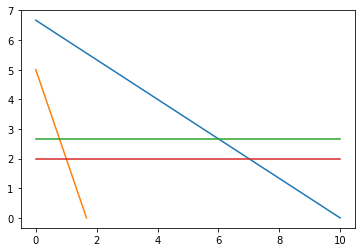

In [22]:
ineq = [[2,3],[3,1],[0,3],[0,1]]   
ineq_r = [20,5,8,2]
graph_inec(ineq,ineq_r)

## Encontrar puntos de intersección

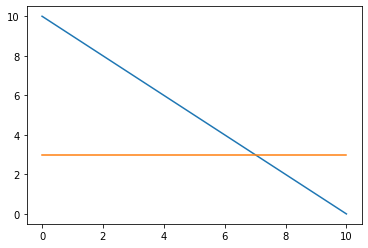

In [23]:
i = [[2,2],[0,3]]
ir = [20,9]
graph_inec(i,ir)

In [24]:
def intersection(L1, L2, R1, R2):
    D  = L1[0] * L2[1] - L1[1] * L2[0]
    Dx = R1 * L2[1] - L1[1] * R2
    Dy = L1[0] * R2 - R1 * L2[0]
    if D != 0:
        x = Dx / D
        y = Dy / D
        return x,y
    else:
        return False

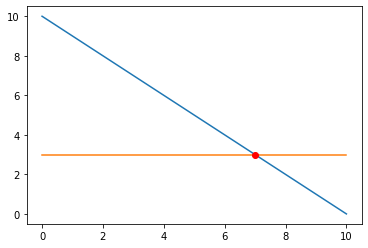

In [25]:
graph_inec(i,ir)
R = intersection([2,2],[0,3],20,9)
pyplot.plot(R[0],R[1],'ro')

In [26]:
def graph_inter(ineq,ineq_r):
    interX = []
    interY = []
    for ine1 , r1 in zip(ineq,ineq_r):
        for ine2 , r2 in zip(ineq,ineq_r):
            R = intersection(ine1,ine2,r1,r2)
            if R and R[0]>0 and R[1]>0:
                interX.append(R[0])
                interY.append(R[1])
    
    pyplot.plot(interX,interY,'ro')
    return interX,interY

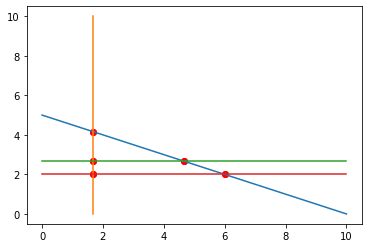

In [27]:
ineq = [[2,4],[3,0],[0,3],[0,1]]   
ineq_r = [20,5,8,2]
interX,interY = graph_inter(ineq,ineq_r)
graph_inec(ineq,ineq_r)

In [31]:
intersecciones = []
for x , y in zip(interX,interY):
    intersecciones.append([x,y])

In [32]:
intersecciones

[[1.6666666666666667, 4.166666666666667],
 [4.666666666666667, 2.6666666666666665],
 [6.0, 2.0],
 [1.6666666666666667, 4.166666666666667],
 [1.6666666666666667, 2.6666666666666665],
 [1.6666666666666667, 2.0],
 [4.666666666666667, 2.6666666666666665],
 [1.6666666666666667, 2.6666666666666665],
 [6.0, 2.0],
 [1.6666666666666667, 2.0]]

## TODO: 
- Una función que le des la inecuación en texto ej: 2x+3y>=20 y te devuelva [2,3,0] [20] *El =< , >= se representarían como 0,1*
- Representar el menor igual y mayor igual (>= , <=) en las inecuaciones lineales
- Determinar la region probando las intersecciónes en todas las inecuaciones. Si es falso esa intersección no pertenece a la región 